# FINAL PROJECT: 

## Introduction

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Import Libraries

Install dan import libraries yang digunakan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [2]:
mpl.style.use(['ggplot'])

## Data Loading

In [3]:
#  data = pd.read_csv('C:/Kuliah/Studi Independen/weatherAUS.csv')
data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/weatherAUS.csv')

Memanggil bagian kepala data.

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Memanggil bagian ekor data.

In [5]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Mengecek dimensi data.

In [6]:
data.shape

(145460, 23)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Mengecek tipe data apa saja yg ada pada variabel.

In [8]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Terdapat 6 variabel bertipe object dan sisanya float

Statistik Deskriptif.

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Mengecek atribut data.

In [11]:
data.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


Dari hasil diatas diketahui bahwa Canberra memiliki data yang paling banyak yaitu berjumlah 3436 data

In [12]:
data.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

Dari hasil diatas diketahui bahwa arah kecepatan angin yang paling tinggi yaitu arah barat (W) yang berjumlah 9915 data

In [13]:
data.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

Dari hasil diatas diketahui bahwa arah angin jam 9 pagi paling sering yaitu arah utara (N) yang berjumlah 11758 data

In [14]:
data.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

Dari hasil diatas diketahui bahwa arah angin jam 3 sore paling sering yaitu arah tenggara (SE) yang berjumlah 10838 data

In [15]:
data.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [16]:
data['RainToday'].value_counts()/len(data)

No     0.758415
Yes    0.219167
Name: RainToday, dtype: float64

Dari hasil diatas, pada variabel 'RainToday' untuk atribut No muncul sebanyak 75.84 % kali dan atribut Yes sebesar 21.9% kali

In [17]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [18]:
data['RainTomorrow'].value_counts()/len(data)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

Dari hasil diatas, pada variabel 'Rain Tomorrow' untuk atribut No muncul sebanyak 75.83 % kali dan atribut Yes sebesar 21.9% kali

## Data Exploration

No     110319
Yes     31880
Name: RainToday, dtype: int64


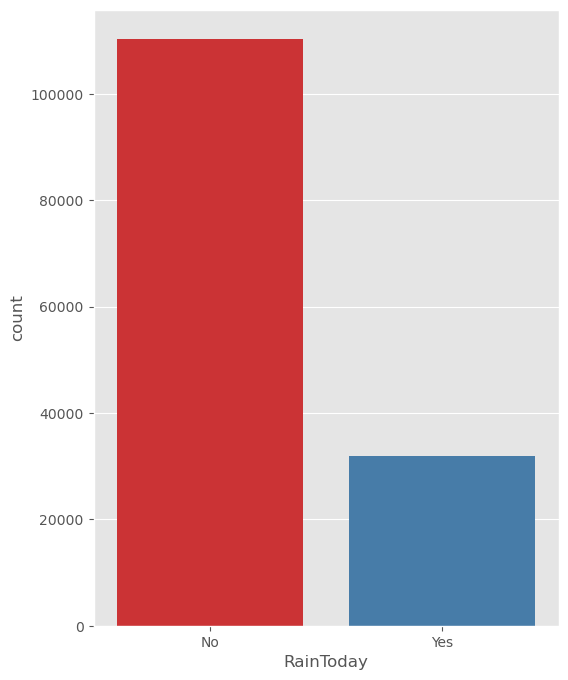

In [19]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainToday.value_counts())
ax = sns.countplot(x="RainToday", data=data, palette="Set1")
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'RainToday', atribut 'No' memiliki 110319 data, dan atribut 'Yes' memiliki 31880 data.

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


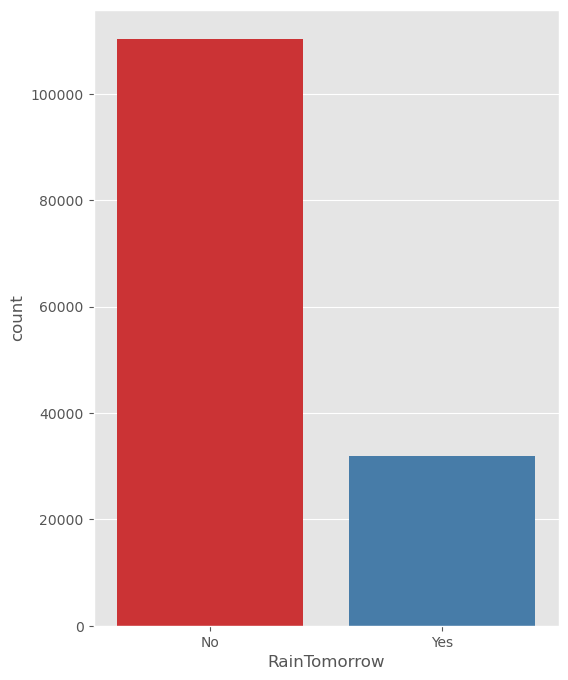

In [20]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainTomorrow.value_counts())
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'RainTomorrow', atribut 'No' memiliki 110316 data, dan atribut 'Yes' memiliki 31877 data.

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


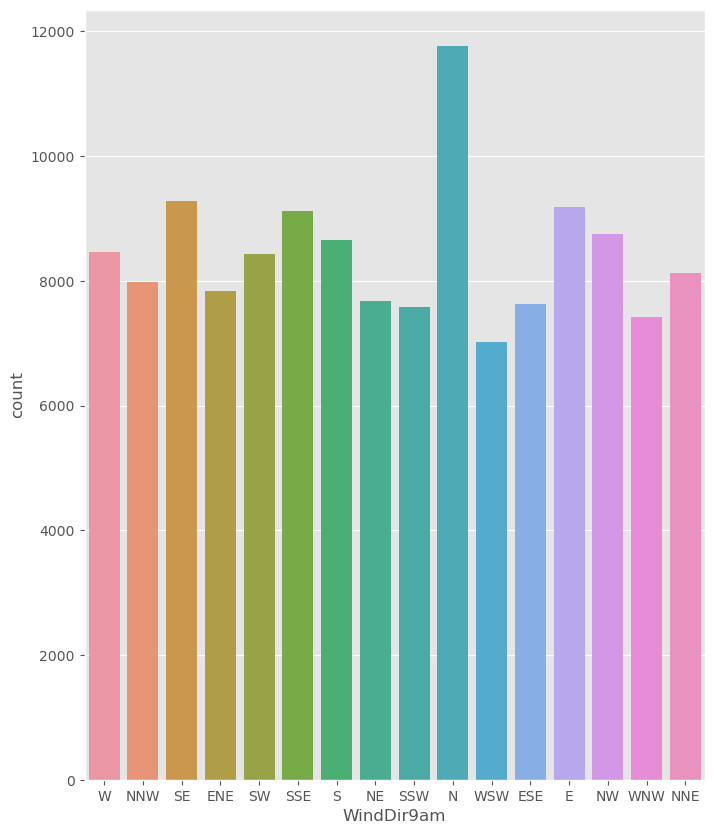

In [21]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir9am.value_counts())
ax = sns.countplot(x="WindDir9am", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindDir9am', arah mata angin pada jam 9 pagi paling banyak adalah arah utara (N)

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


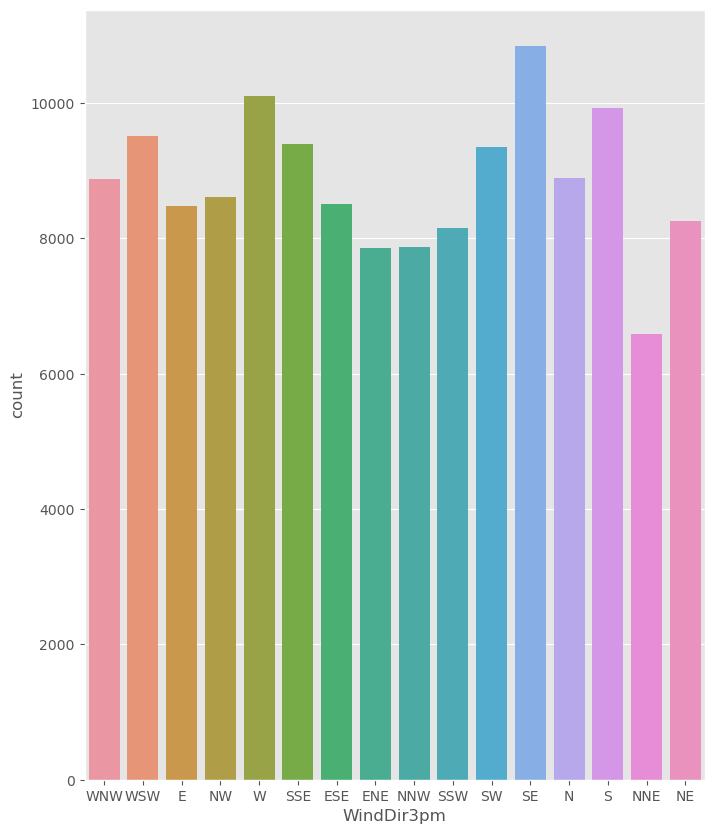

In [22]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir3pm.value_counts())
ax = sns.countplot(x="WindDir3pm", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindDir3pm', arah mata angin pada jam 3 sore paling banyak adalah arah tenggara (SE)

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


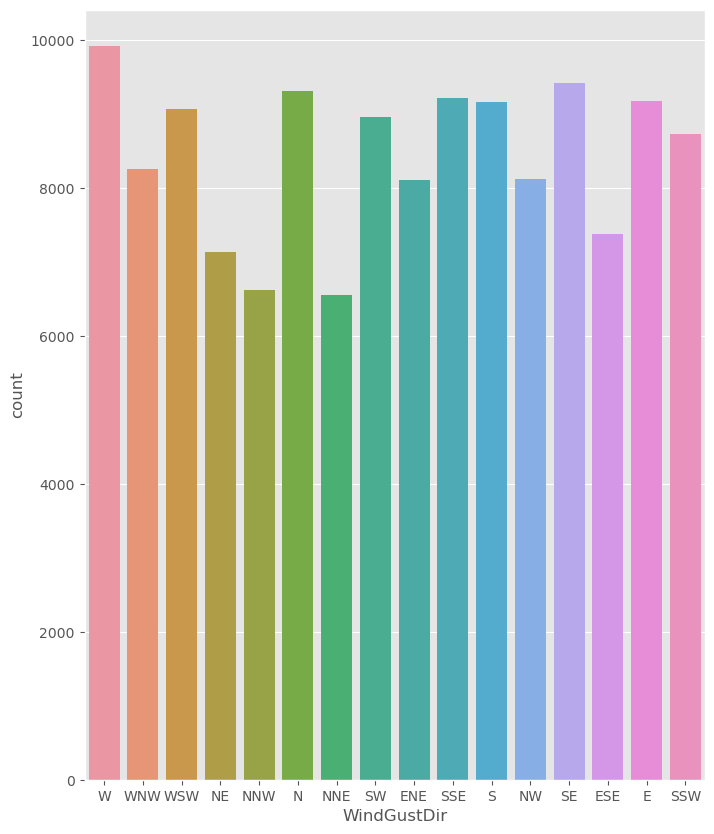

In [23]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindGustDir.value_counts())
ax = sns.countplot(x="WindGustDir", data=data)
plt.show()

dari hasil plot di atas menunjukkan bahwa variabel 'WindGustDir', arah kecepatan angin yang paling tinggi adalah arah barat (W) dan yang kedua paling tinggi adalah arah tenggara (SE)

Mengecek Outlier

In [24]:
numerical_columns = data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


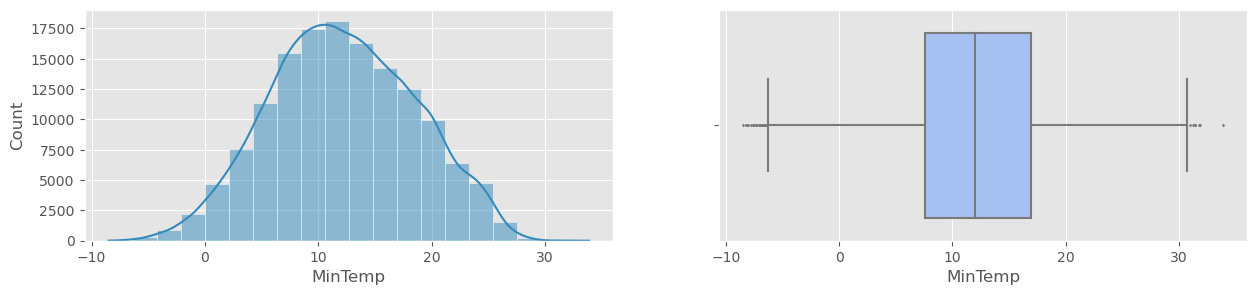

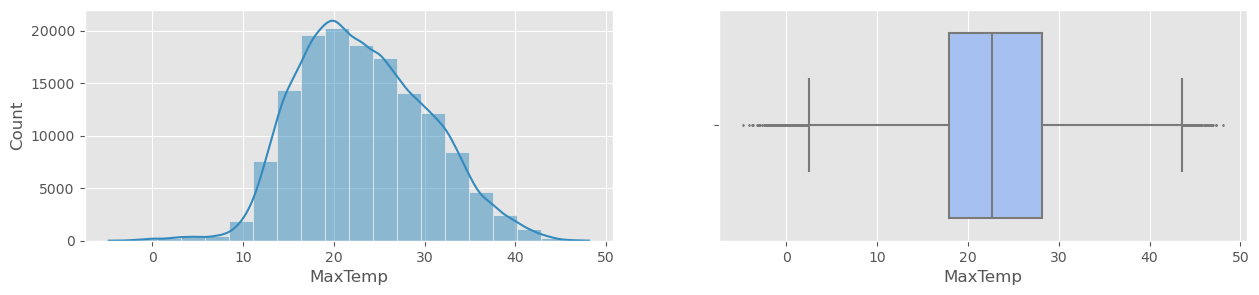

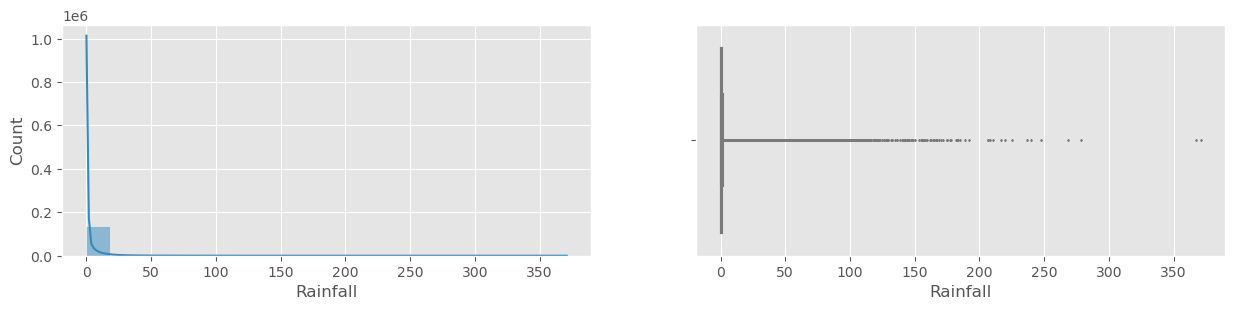

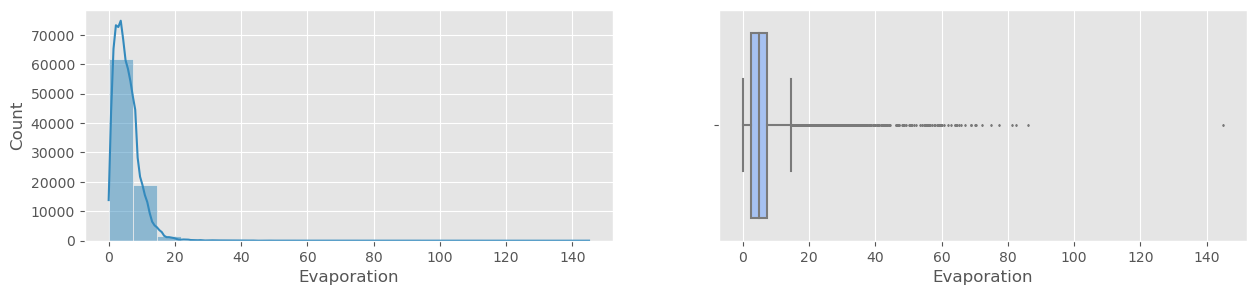

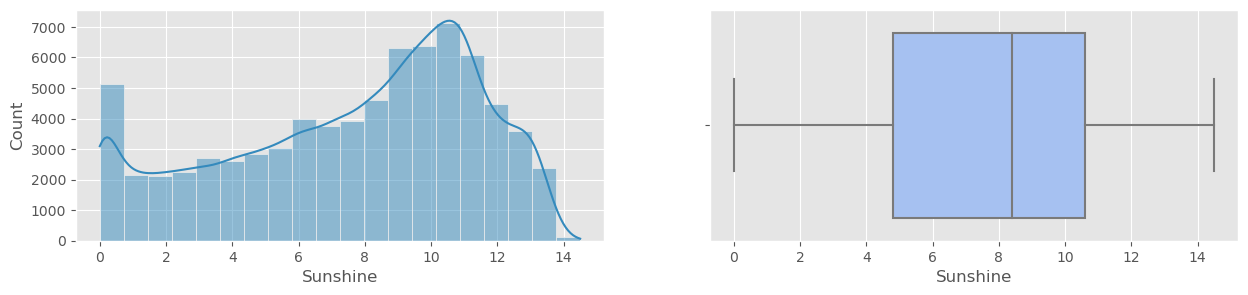

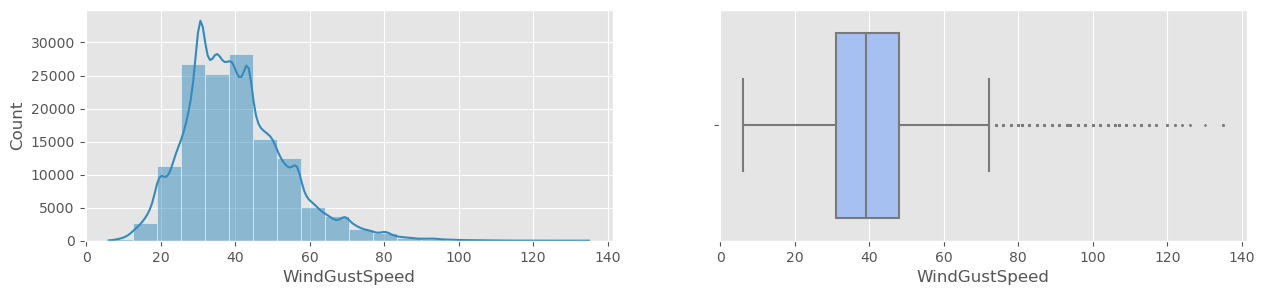

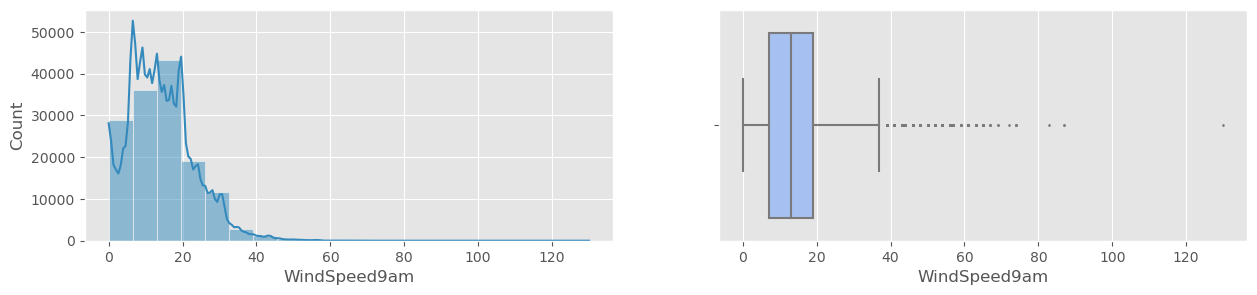

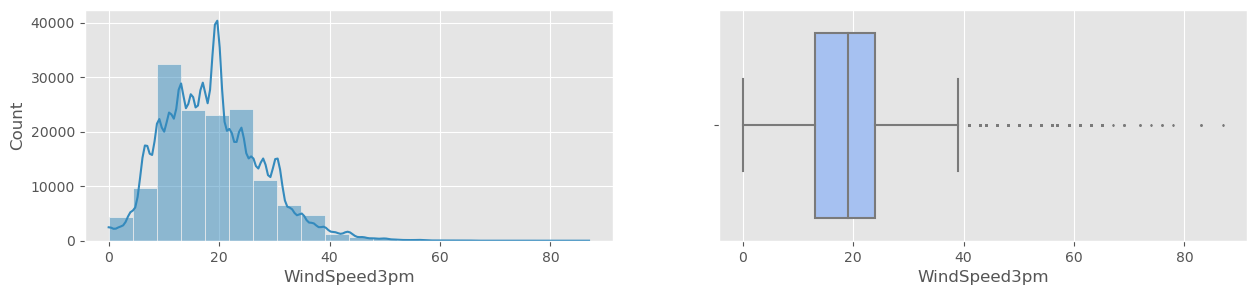

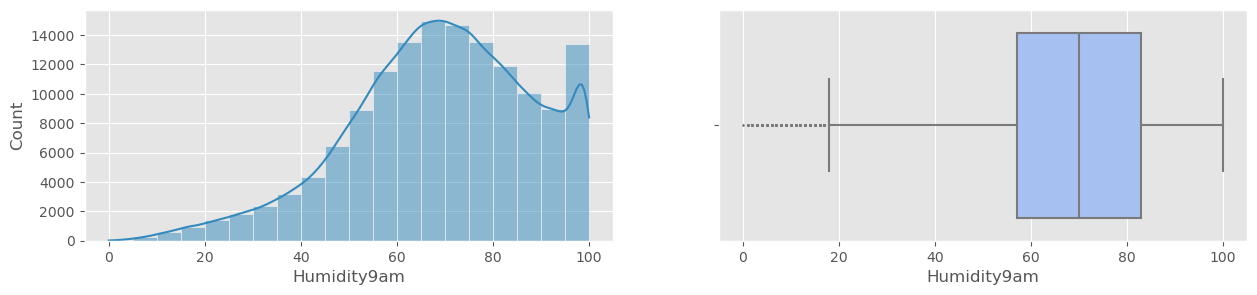

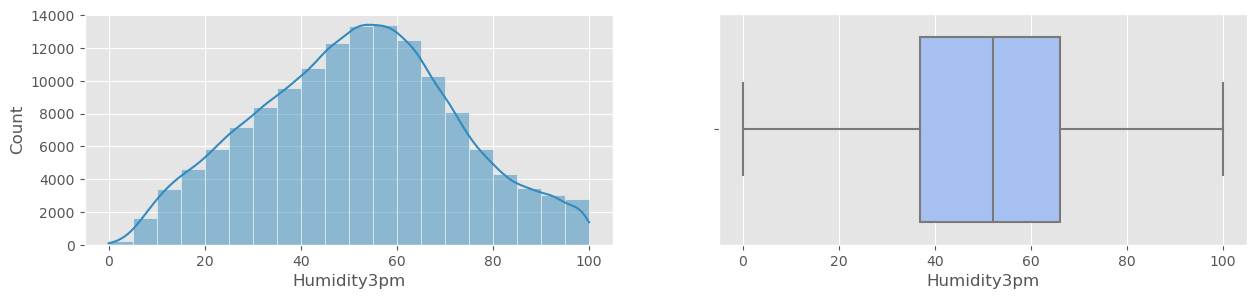

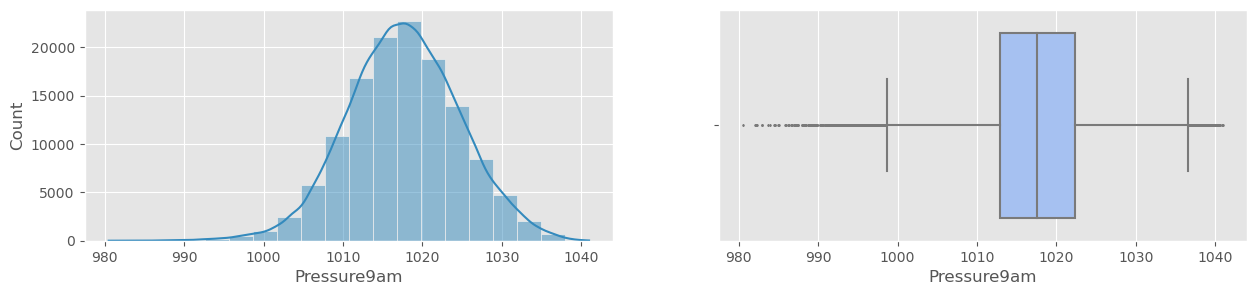

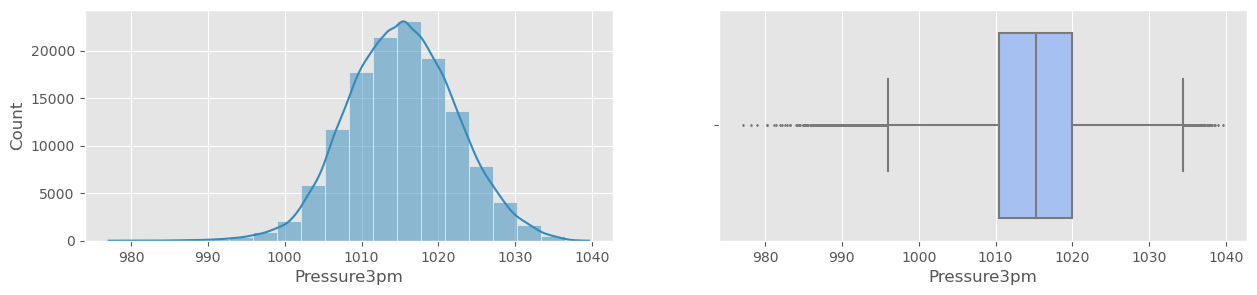

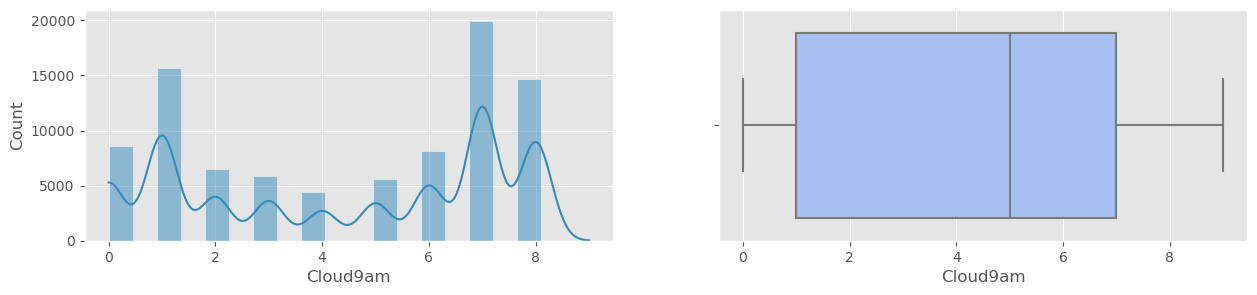

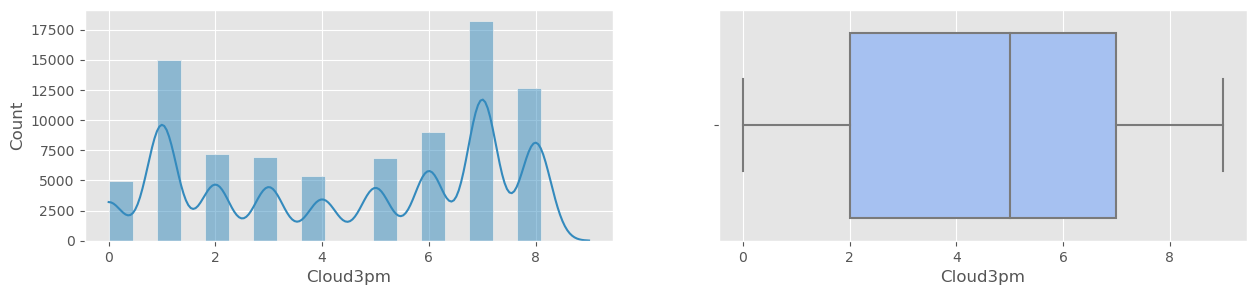

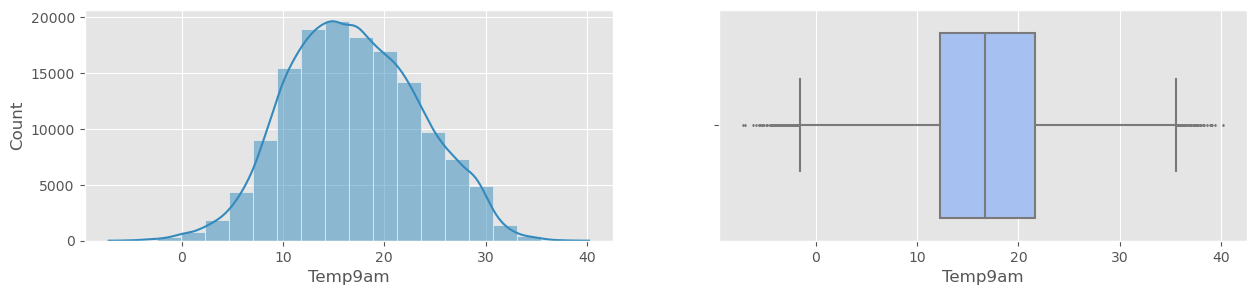

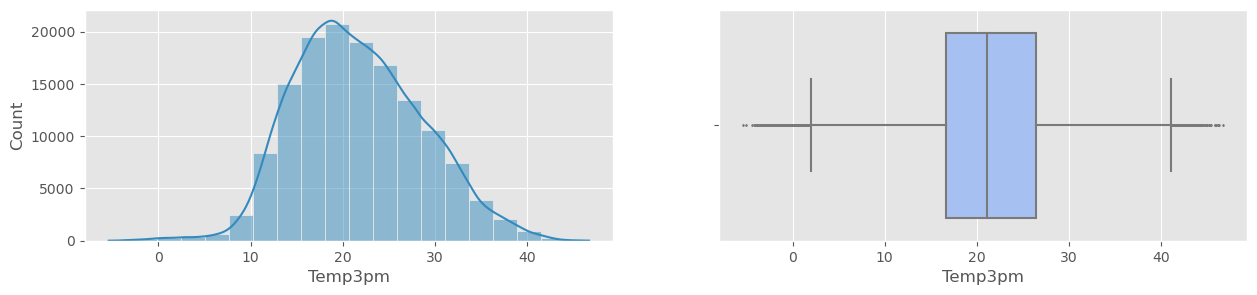

In [25]:
for i in numerical_columns:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Menampilkan Heatmap.

<AxesSubplot:>

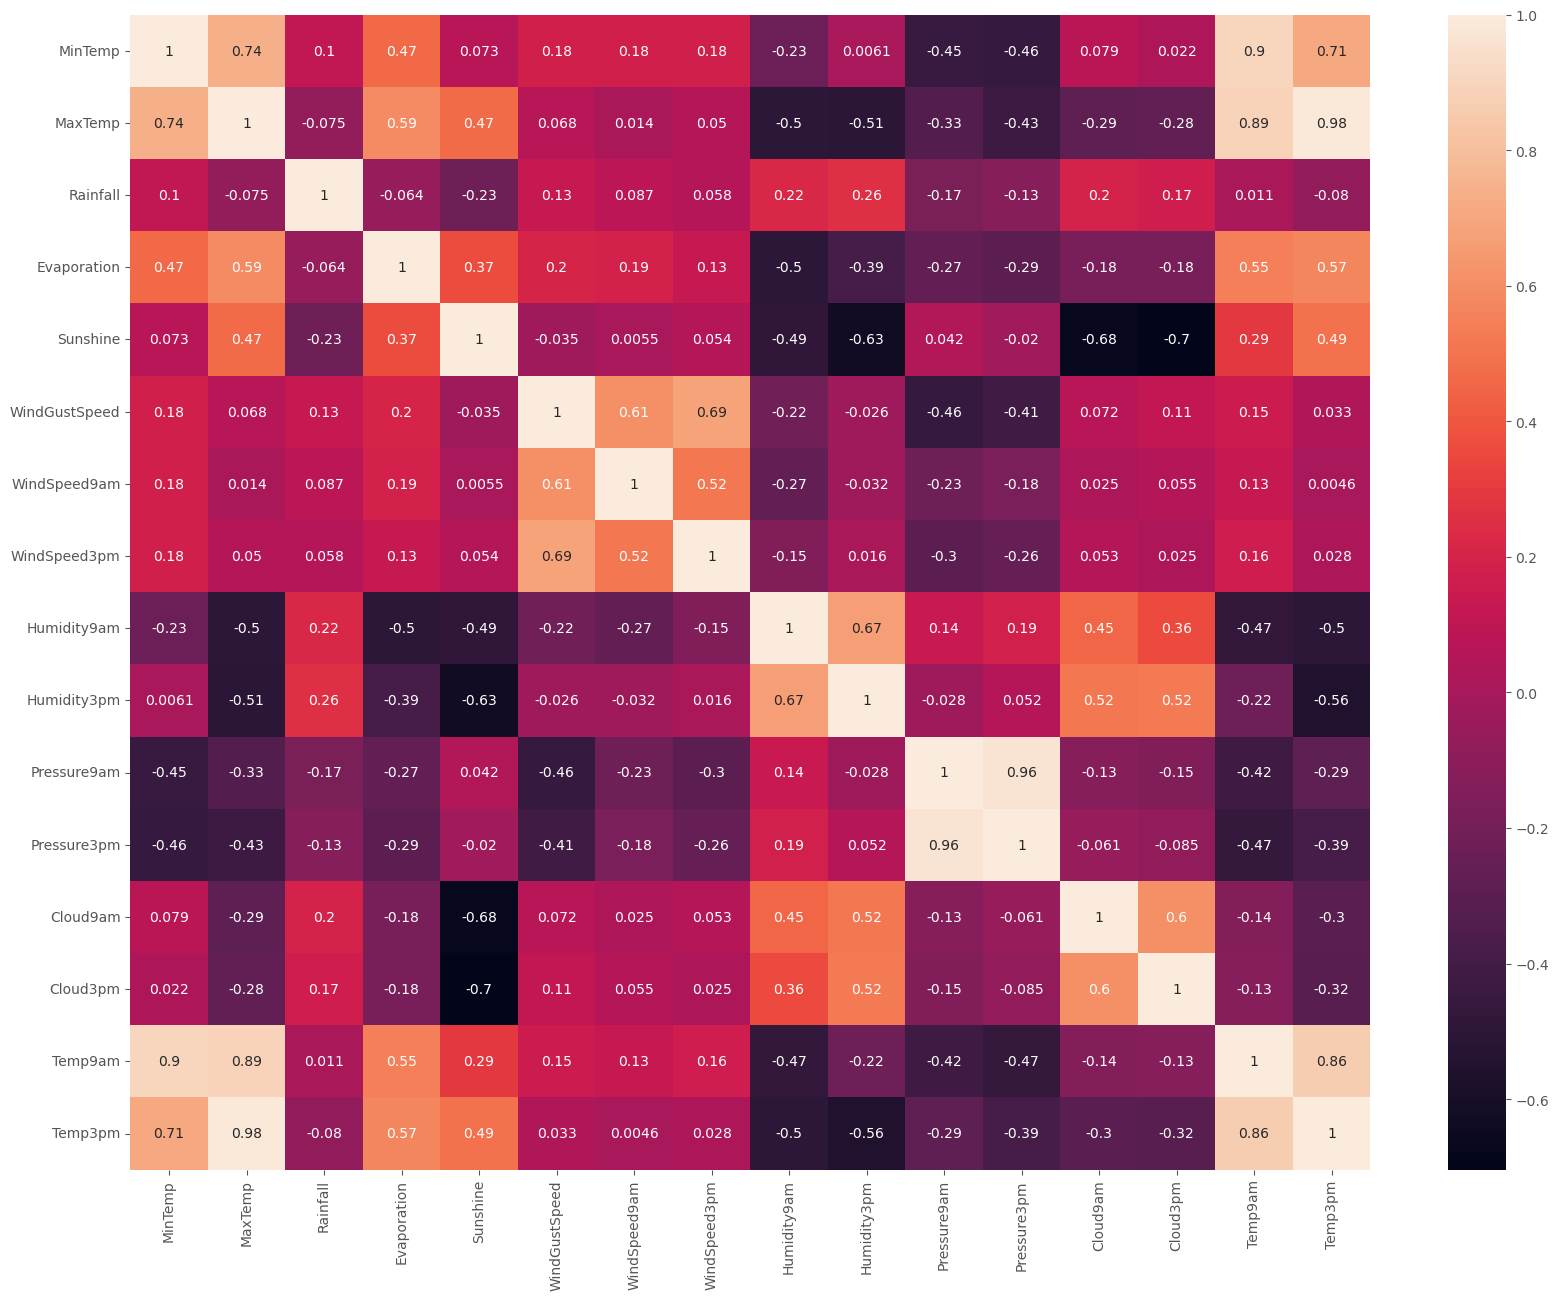

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Variabel yang memiliki korelasi yang erat adalah :
1. MinTemp dan MaxTemp sangat berkorelasi
2. MinTemp dan Temp9am sangat berkorelasi.
3. MinTemp dan Temp3pm sangat berkorelasi.
4. MaxTemp dan Temp9am sangat berkorelasi.
5. MaxTemp dan Temp3pm sangat berkorelasi.
6. Temp3pm dan Temp9am sangat berkorelasi.
7. Pressure9am dan Pressure3pm sangat berkorelasi.

In [118]:
data2 = data.drop(['Temp3pm', 'Temp9am','Pressure9am'],axis=1)

## Data Cleaning

In [119]:
clean_data = data2.copy()

Mengecek jumlah data yang memiliki duplicate.

In [29]:
clean_data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [30]:
clean_data.duplicated().value_counts()

False    145460
dtype: int64

Tidak terdapat data yang duplicated pada data

### Menambah Kolom Baru

Mengonversi Date menjadi Year, Month, dan Day.

In [120]:
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['Day'] = clean_data['Date'].dt.day

Melakukan drop pada variable Date setelah dikonversi

In [121]:
clean_data = clean_data.drop('Date', axis=1)

### Mengisi Missing Value

In [33]:
clean_data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Hasil diatas menunjukkan bahwa banyak terdapat data yang masih kosong pada seluruh variabel kecuali 'Year', 'Month', 'Day' dan 'Location'

Mengelompokkan kolom yang bertipe data 'object' atau kategorik

In [122]:
categorical_columns = clean_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [35]:
categorical_columns = categorical_columns.append(clean_data[['Year', 'Month', 'Day']].columns)

In [36]:
clean_data[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Location      145460 non-null  object
 1   WindGustDir   135134 non-null  object
 2   WindDir9am    134894 non-null  object
 3   WindDir3pm    141232 non-null  object
 4   RainToday     142199 non-null  object
 5   RainTomorrow  142193 non-null  object
 6   Year          145460 non-null  int64 
 7   Month         145460 non-null  int64 
 8   Day           145460 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 10.0+ MB


In [37]:
clean_data[categorical_columns].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

Mengganti missing value dalam fitur kategorikal dengan nilai Modus, tetapi missing value pada kolom RainTomorrow dihapus

In [123]:
for column in clean_data[categorical_columns]:
    if column == 'RainTomorrow':
        clean_data = clean_data.dropna(axis=0, how='any', subset=["RainTomorrow"])
    elif clean_data[column].isnull().sum() > 0:
        clean_data[column] = clean_data[column].fillna(clean_data[column].mode()[0])

In [39]:
clean_data[categorical_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Year            0
Month           0
Day             0
dtype: int64

Sudah tidak terdapat lagi missing value pada data kategorik

In [40]:
numerical_columns = clean_data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Year', 'Month',
       'Day'],
      dtype='object')


In [41]:
clean_data[numerical_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Year                 0
Month                0
Day                  0
dtype: int64

Mengisi missing value pada kolom numerikal dengan menggunakan IterativeImputer. Sebelum menggunakan IterativeImputer, dilakukan encode terlebih dahulu.

In [124]:
categorical_columns.drop('RainTomorrow')

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [128]:
le = LabelEncoder()
for col in categorical_columns:
    # Tipe data string diubah menjadi tipe data integer
    clean_data[col] = le.fit_transform(clean_data[col]).astype(int)

In [129]:
clean_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,71.0,22.0,1007.1,8.0,NaN,0,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,44.0,25.0,1007.8,NaN,NaN,0,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,38.0,30.0,1008.7,NaN,2.0,0,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,45.0,16.0,1012.8,NaN,NaN,0,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,82.0,33.0,1006.0,7.0,8.0,0,0,2008,12,5


In [130]:
imputed_data = clean_data.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(clean_data)

In [132]:
imputed_data[categorical_columns].values

array([[ 2., 13., 13., 14.,  0.,  0.],
       [ 2., 14.,  6., 15.,  0.,  0.],
       [ 2., 15., 13., 15.,  0.,  0.],
       ...,
       [41.,  6.,  9.,  3.,  0.,  0.],
       [41.,  3.,  9., 14.,  0.,  0.],
       [41.,  9., 10.,  3.,  0.,  0.]])

In [133]:
# Encoder
ohc = OneHotEncoder()

for col in categorical_columns.drop('RainTomorrow'):
    # Tipe data string diubah menjadi tipe data integer
    # dat = le.fit_transform(clean_data[col]).astype(int)
    
    # Melalukan one hot encoding yang nantinya akan mengembalikan nilai array
    new_dat = ohc.fit_transform(imputed_data[col].values.reshape(-1,1))

    # Membuat nama kolom yang unik
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Membuat dataframe baru
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=imputed_data.index, 
                          columns=col_names)
    
    # Menambahkan data baru ke dataframe
    imputed_data = pd.concat([imputed_data, new_df], axis=1)
    
    # Menghapus kolom original dari dataframe
    imputed_data = imputed_data.drop(col, axis=1)

Berikutnya mengisi missing value dengan menggunakan IterativeImputer.

In [134]:
imputed_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15,RainToday_0,RainToday_1
0,13.4,22.9,0.6,5.905000,7.343841,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,7.4,25.1,0.0,6.130483,11.058468,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,12.9,25.7,0.0,7.652659,11.613570,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,9.2,28.0,0.0,6.242676,11.937524,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17.5,32.3,1.0,6.517689,6.687293,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# for column in clean_data[numerical_columns]:
#     clean_data[column] = clean_data[column].fillna(clean_data[column].mean())

In [136]:
imputed_data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
                ..
WindDir3pm_13    0
WindDir3pm_14    0
WindDir3pm_15    0
RainToday_0      0
RainToday_1      0
Length: 116, dtype: int64

Sudah tidak ditemukan lagi missing value pada data

In [93]:
imputed_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30
0,13.4,22.9,0.6,5.904798,7.343848,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.4,25.1,0.0,6.130840,11.061672,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.9,25.7,0.0,7.652763,11.613584,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.2,28.0,0.0,6.243204,11.942261,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,6.517302,6.687271,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
len(numerical_columns)

16

## Data Preprocessing

### Scale

In [97]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Columns: 168 entries, MinTemp to Day_30
dtypes: float64(168)
memory usage: 183.3 MB


In [137]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

<AxesSubplot:>

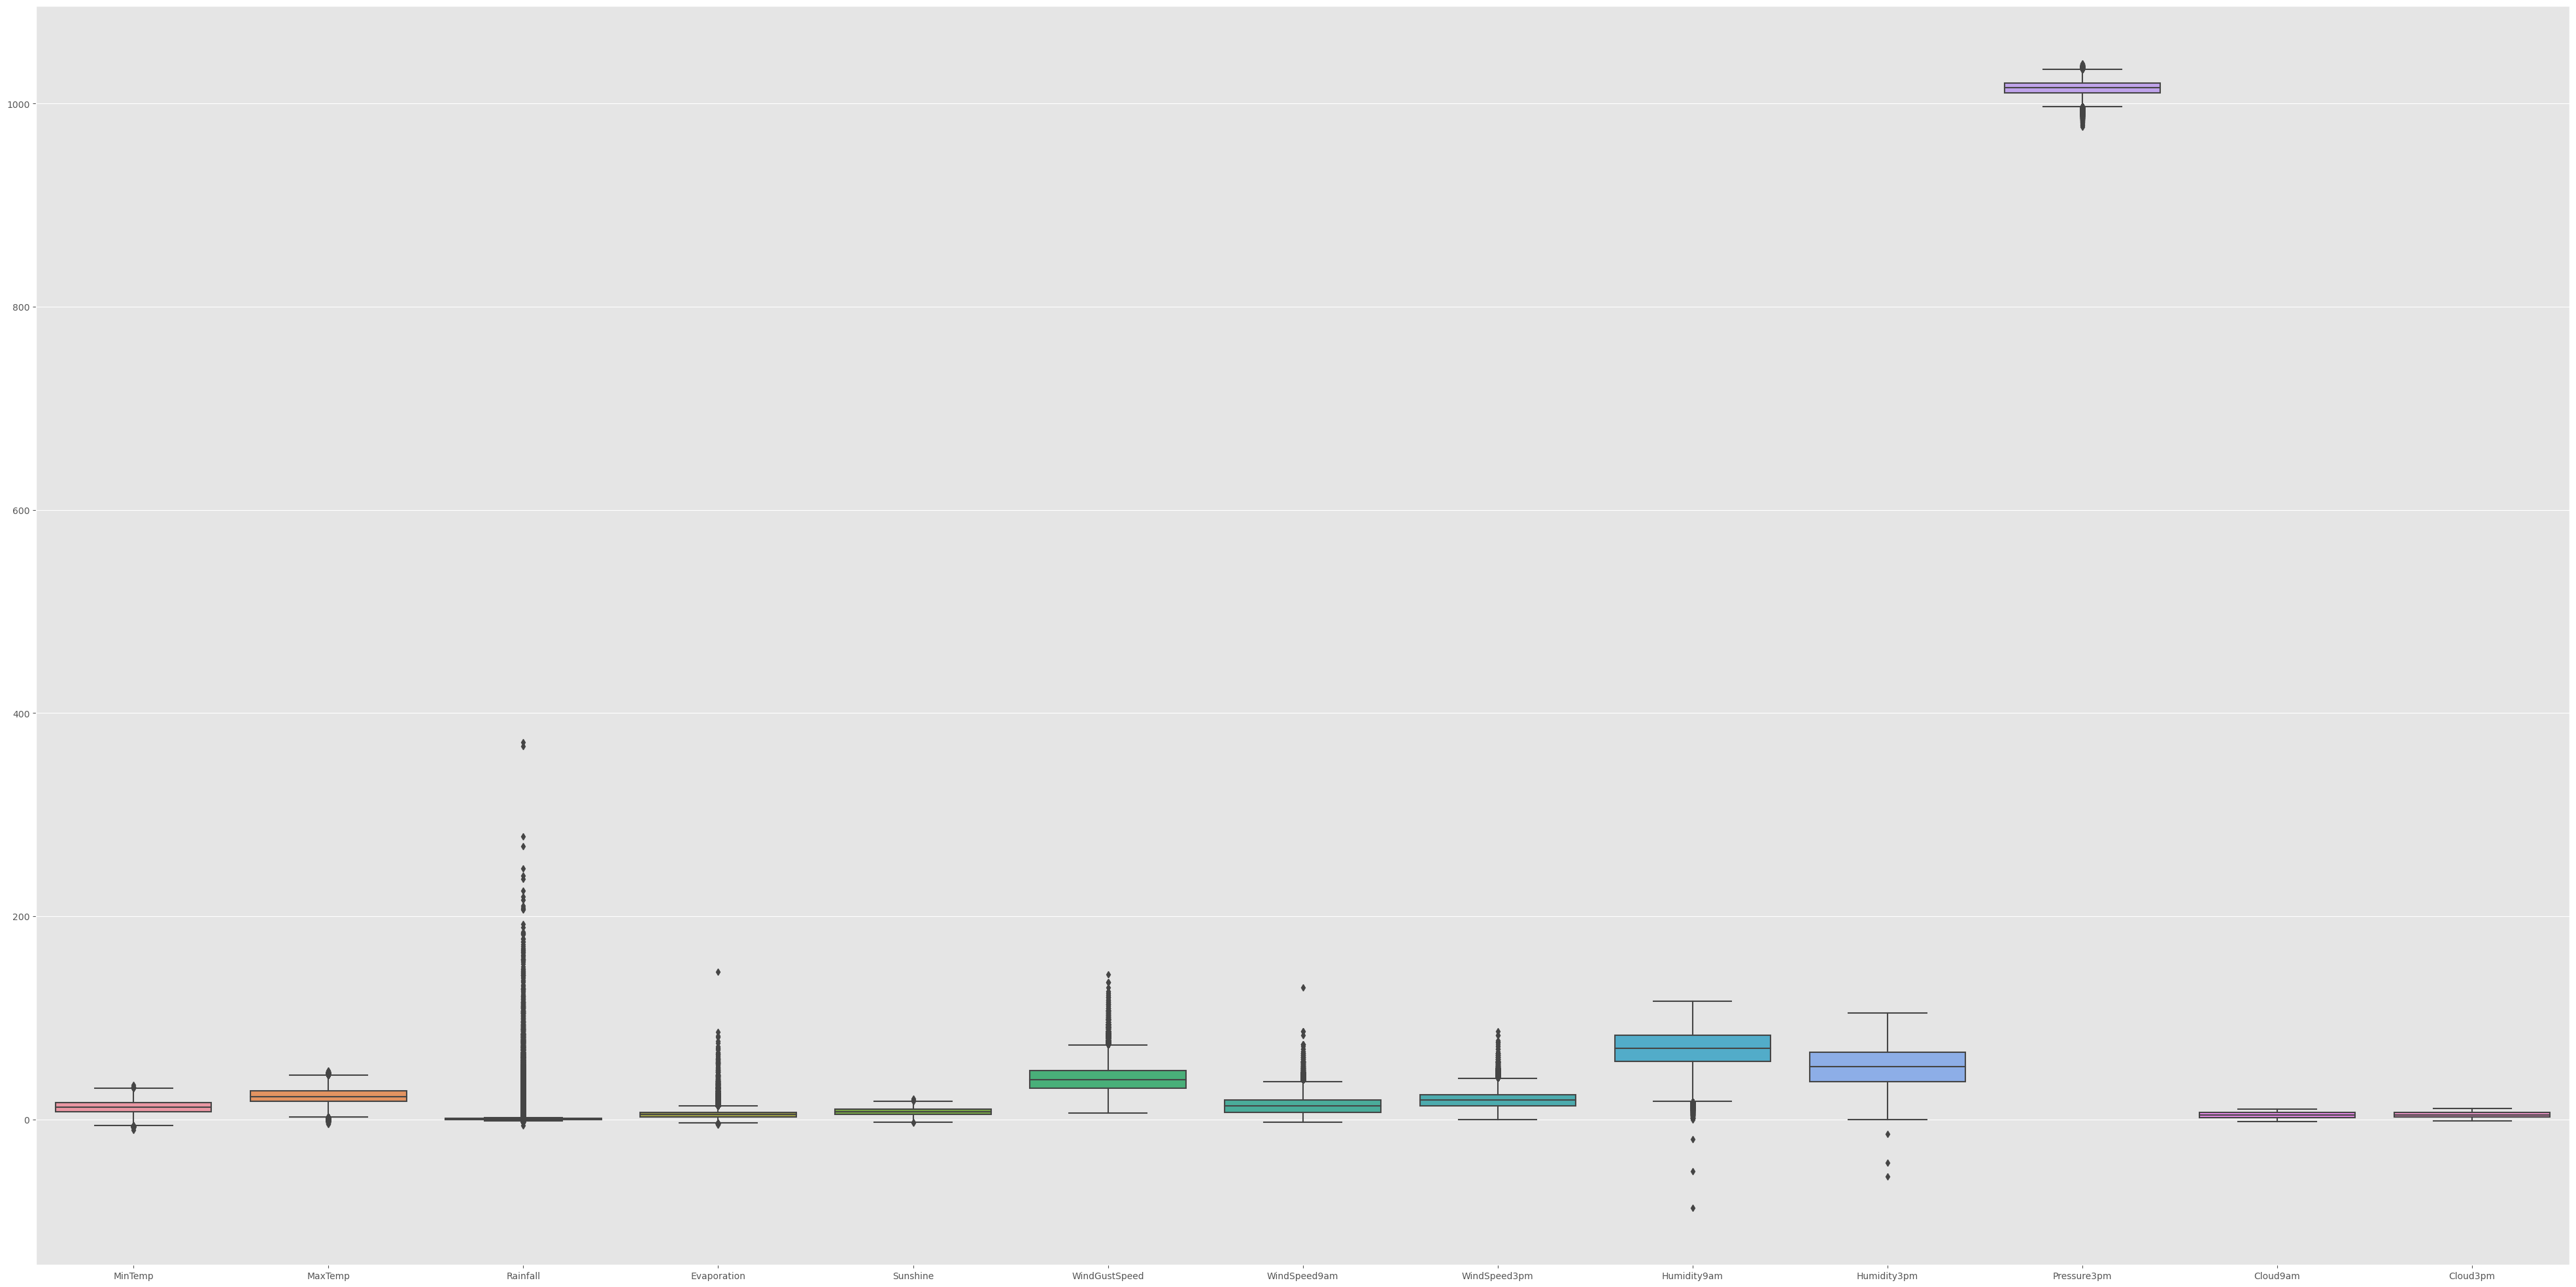

In [138]:
plt.figure(figsize=(50,25))
sns.boxplot(data=imputed_data[num_features])

In [153]:
scaled_data = imputed_data.copy()

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(scaled_data)
scaled_data = pd.DataFrame(r_scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)

<AxesSubplot:>

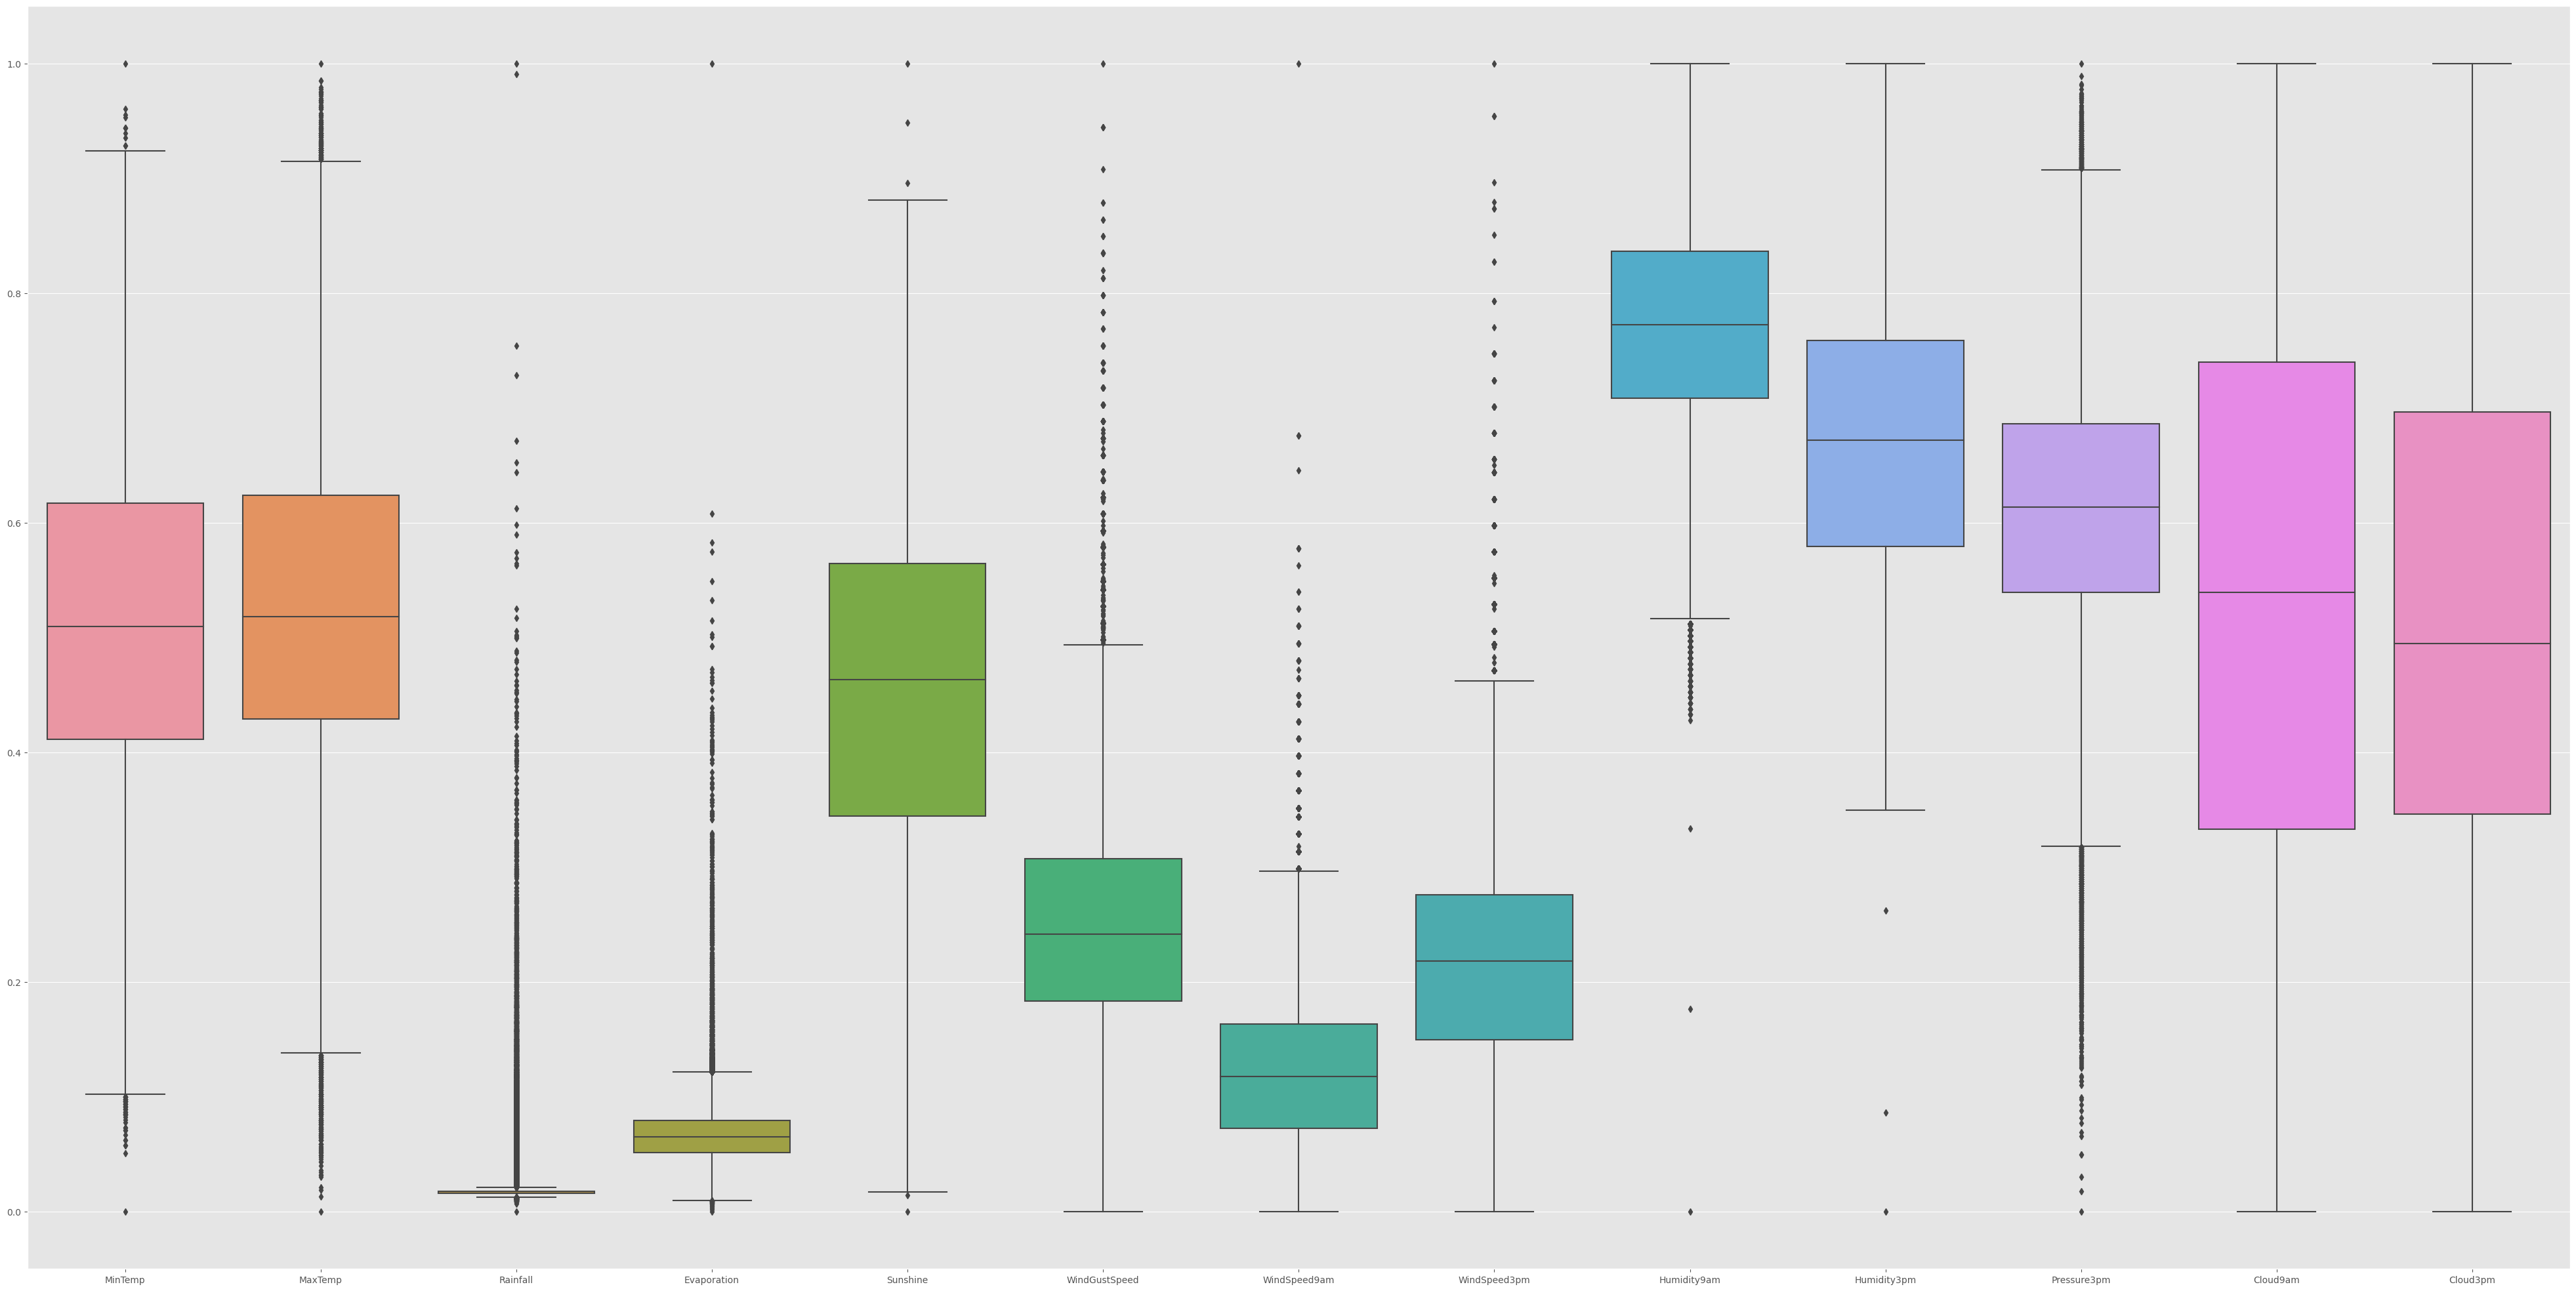

In [140]:
plt.figure(figsize=(50,25))
sns.boxplot(data=scaled_data[num_features])

Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm memiliki outlier yang substansial.

In [155]:
from sklearn.preprocessing import PowerTransformer
scaled_data.drop('RainTomorrow', axis=1).iloc[:, :] = PowerTransformer().fit_transform(scaled_data.drop('RainTomorrow', axis=1))

In [156]:
scaled_data.RainTomorrow

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145454    0.0
145455    0.0
145456    0.0
145457    0.0
145458    0.0
Name: RainTomorrow, Length: 142193, dtype: float64

In [90]:
outlier_features = ['Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm']
outlier_range = pd.DataFrame(columns = ["Feature", "Lowerbound", "Upperbound"])

for i,feature in enumerate(outlier_features):
    IQR = scaled_data[feature].quantile(0.75) - scaled_data['RainTomorrow'].quantile(0.25)
    lower_bound = scaled_data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = scaled_data[feature].quantile(0.75) + (IQR * 3)
    print(feature + "  outlier is < {lowerbound} and > {upperbound}".format(lowerbound=round(lower_bound,2), upperbound=round(upper_bound,2)))
    outlier_range.loc[i] = [feature, lower_bound, upper_bound]

Rainfall  outlier is < -0.04 and > 0.07
Evaporation  outlier is < -0.19 and > 0.32
WindGustSpeed  outlier is < -0.74 and > 1.23
WindSpeed9am  outlier is < -0.42 and > 0.65
WindSpeed3pm  outlier is < -0.68 and > 1.1
Humidity9am  outlier is < -1.8 and > 3.34
Humidity3pm  outlier is < -1.7 and > 3.04
Pressure3pm  outlier is < -1.52 and > 2.75


In [91]:
outlier_range

,Feature,Lowerbound,Upperbound
0,Rainfall,-0.037597,0.070948
1,Evaporation,-0.186935,0.317998
2,WindGustSpeed,-0.739500,1.230059
3,WindSpeed9am,-0.416521,0.652073
4,WindSpeed3pm,-0.678161,1.103448
5,Humidity9am,-1.800022,3.344645
6,Humidity3pm,-1.697159,3.035309
7,Pressure3pm,-1.520000,2.745600


In [92]:
scaled_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,0.041667,0.541112,0.523629,0.017206,0.073079,0.442842,0.866667,0.278228,0.866667,0.933333,...,0.777223,0.486476,0.4800,0.821239,0.515656,0.0,0.0,0.1,1.0,0.000000
1,0.041667,0.406804,0.565217,0.015614,0.074585,0.599788,0.933333,0.278228,0.400000,1.000000,...,0.644611,0.505045,0.4912,0.337894,0.364637,0.0,0.0,0.1,1.0,0.033333
2,0.041667,0.529920,0.576560,0.015614,0.084727,0.623087,1.000000,0.292871,0.866667,1.000000,...,0.615142,0.535994,0.5056,0.342723,0.295953,0.0,0.0,0.1,1.0,0.066667
3,0.041667,0.447096,0.620038,0.015614,0.075334,0.636961,0.266667,0.131792,0.600000,0.000000,...,0.649523,0.449337,0.5712,0.262809,0.271258,0.0,0.0,0.1,1.0,0.100000
4,0.041667,0.632890,0.701323,0.018268,0.077160,0.415125,0.866667,0.256262,0.066667,0.466667,...,0.831250,0.554564,0.4624,0.739950,0.778382,0.0,0.0,0.1,1.0,0.133333


In [142]:
scaled_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_8', 'WindDir3pm_9', 'WindDir3pm_10', 'WindDir3pm_11',
       'WindDir3pm_12', 'WindDir3pm_13', 'WindDir3pm_14', 'WindDir3pm_15',
       'RainToday_0', 'RainToday_1'],
      dtype='object', length=116)

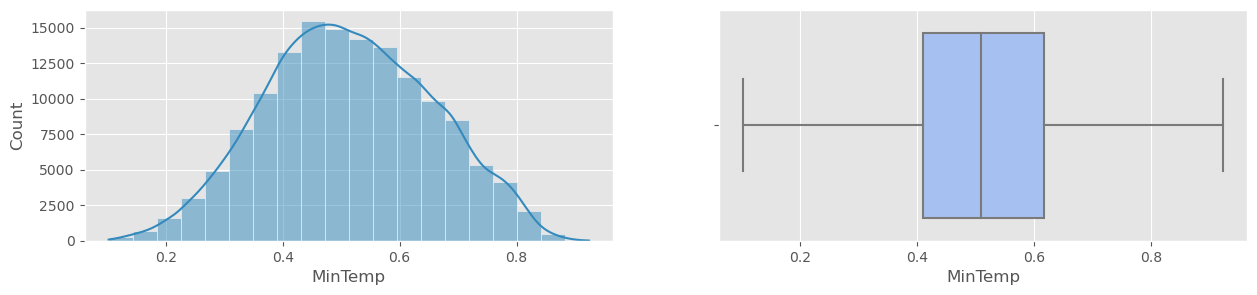

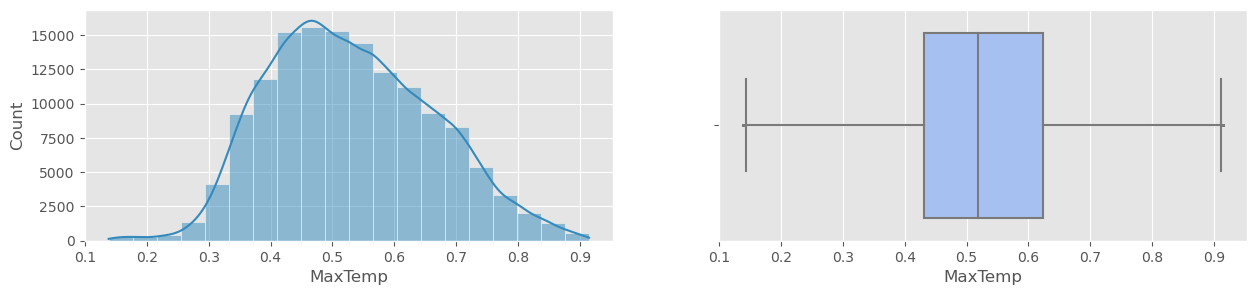

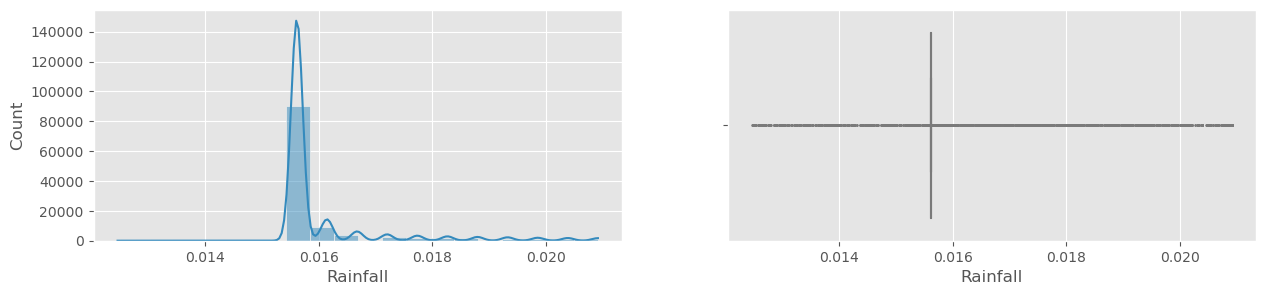

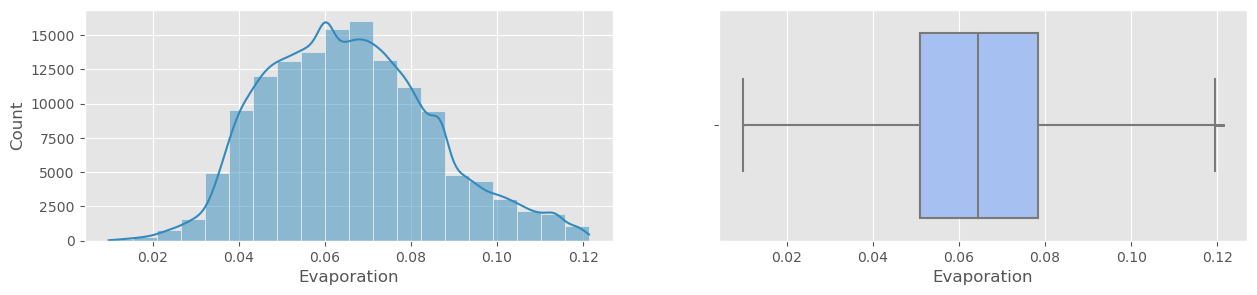

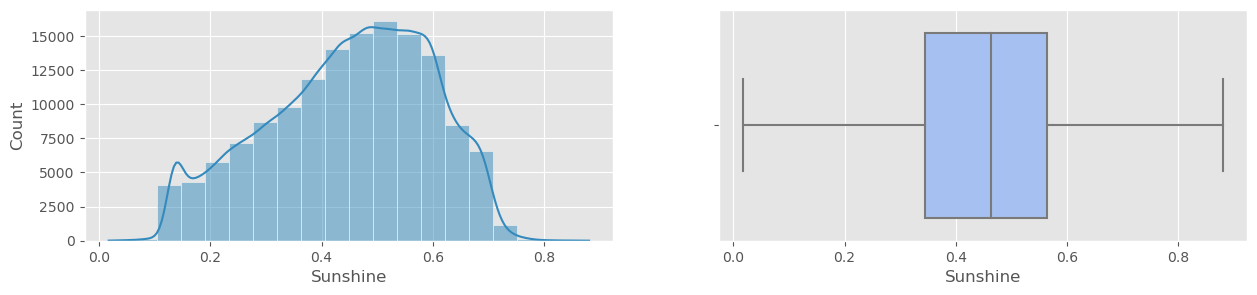

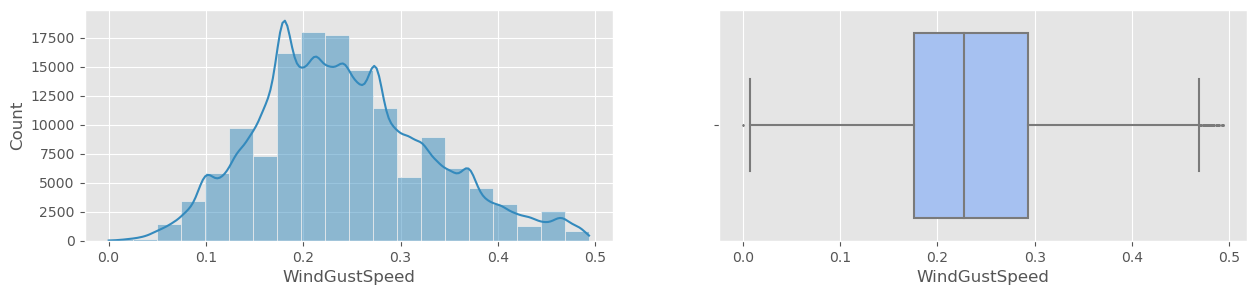

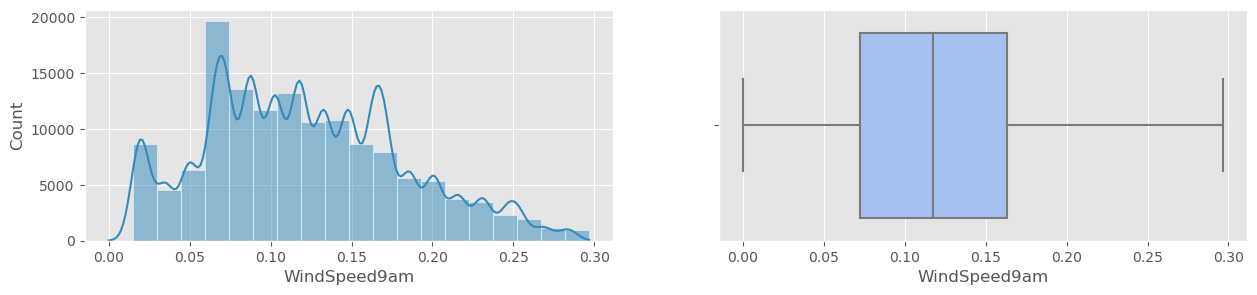

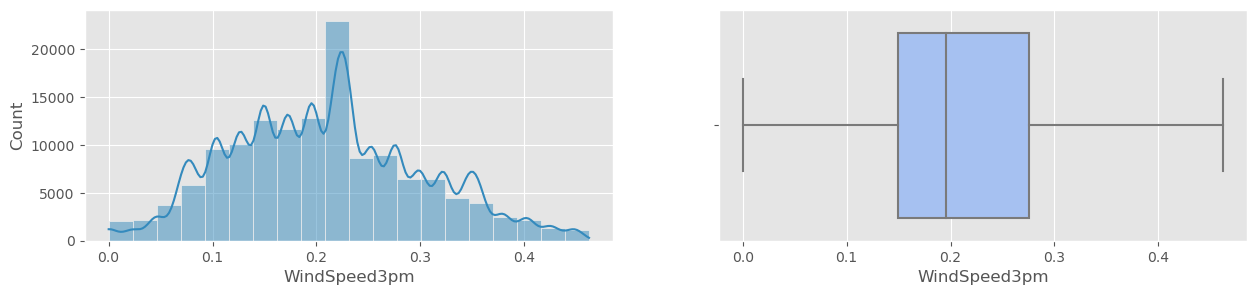

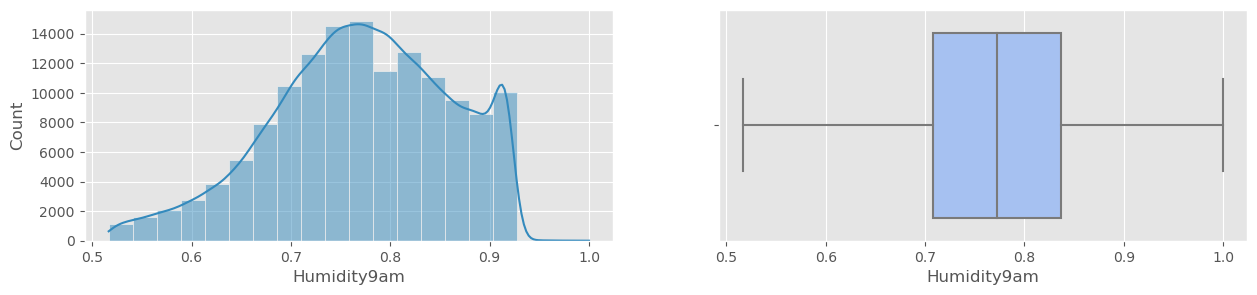

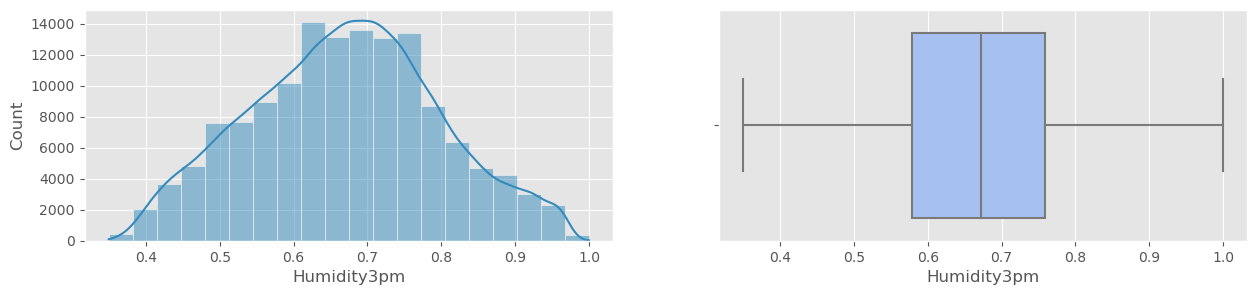

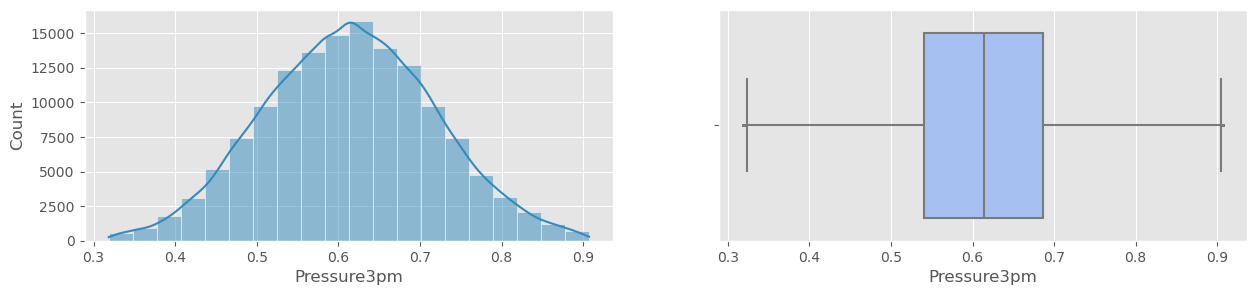

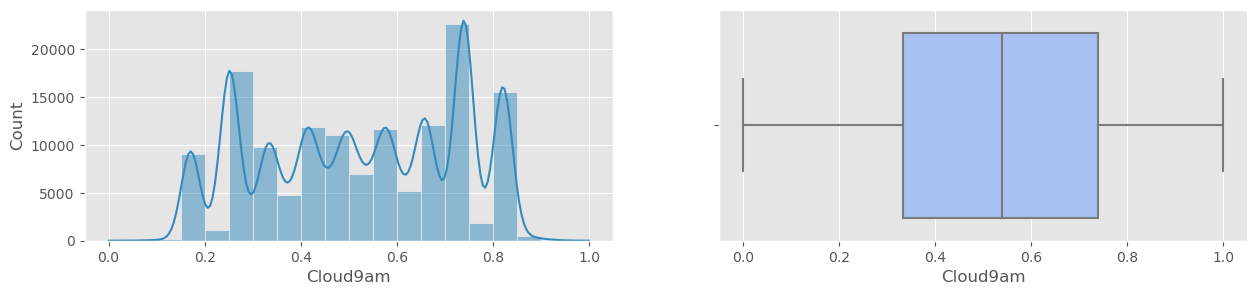

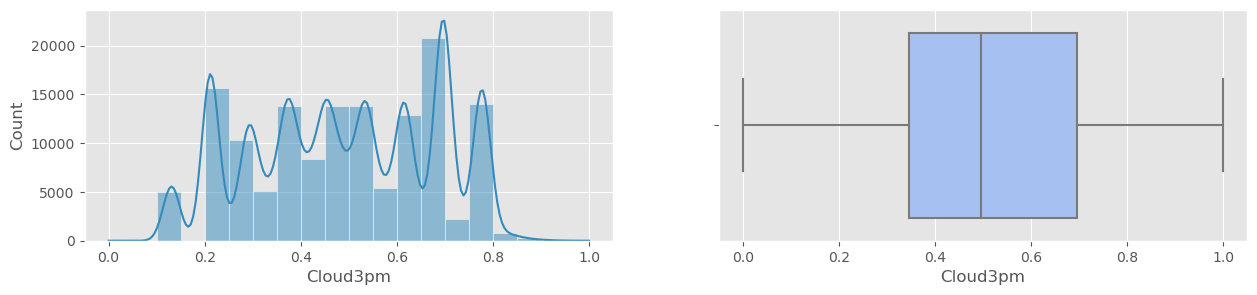

In [157]:
for col in scaled_data[num_features]:
    Q1 = scaled_data[col].quantile(0.25)
    Q3 = scaled_data[col].quantile(0.75)
    IQR = Q3 - Q1
    scaled_data2 = scaled_data[~((scaled_data[col] < (Q1 - 1.5 * IQR)) | (scaled_data[col]  > (Q3 + 1.5 * IQR)))]
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(scaled_data2[col],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(scaled_data2[col], ax = axs[1], color='#99befd', fliersize=1);

In [158]:
scaled_data2.RainTomorrow

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145454    0.0
145455    0.0
145456    0.0
145457    0.0
145458    0.0
Name: RainTomorrow, Length: 142193, dtype: float64

### Split Data

In [174]:
x = scaled_data2.drop(['RainTomorrow'], axis = 1) 
y = scaled_data2.RainTomorrow

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [161]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

In [162]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state = 0)
x_train_oversampling, y_train_oversampling = oversampling.fit_resample(x_train, y_train)

Menampilkan variabel X.

In [163]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15,RainToday_0,RainToday_1
0,0.541088,0.523629,0.017206,0.073028,0.443713,0.278250,0.170559,0.275862,0.777317,0.486033,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.406772,0.565217,0.015614,0.074530,0.601003,0.278250,0.049913,0.252874,0.644468,0.504636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.529895,0.576560,0.015614,0.084675,0.624508,0.292894,0.163019,0.298851,0.614947,0.535641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.447067,0.620038,0.015614,0.075278,0.638225,0.131802,0.102696,0.103448,0.649389,0.448827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.632870,0.701323,0.018268,0.077111,0.415912,0.256283,0.072535,0.229885,0.831440,0.554244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Menampilkan variabel Y.

In [164]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

### Feature Selection

In [165]:
# Initializing Random Forest Classifier
LR_RFE = LogisticRegression() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=LR_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train_oversampling, y_train_oversampling)

In [ ]:
# Initializing Random Forest Classifier
LR_RFE = LogisticRegression() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=LR_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)

In [166]:
print("Fitur terbaik berdasarkan RFE:")
features = []
for i in x_train.columns[rfe.support_]:
    print(i)
    features.append(i) 

Fitur terbaik berdasarkan RFE:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
Humidity3pm
Pressure3pm
Cloud9am


In [143]:
features

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am']

In [167]:
x_train_rfe = rfe.transform(x_train_oversampling)
x_test_rfe = rfe.transform(x_test)

## Model Definition

## Model Training

### Logistic Regression

#### Create a model and fit it

In [168]:
lr_model = LogisticRegression()
lr_model.fit(x_train_rfe, y_train_oversampling)

LogisticRegression()

#### Get results

In [170]:
from sklearn.metrics import roc_auc_score

In [171]:
lr_pred = lr_model.predict(x_train_rfe)
accuracy = roc_auc_score(y_train_oversampling, lr_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8160149123502816


### Random Forest

#### Create a model and fit it

In [147]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_rfe, y_train_oversampling)

RandomForestClassifier()

#### Get results

In [148]:
print('train score : ', rf_model.score(x_train_rfe, y_train_oversampling))

train score :  0.9999886684268376


### Support Vector Machine

#### Create a model and fit it

In [ ]:
svc_model = SVC()
svc_model.fit(x_train_rfe, y_train_oversampling) 

#### Get results

In [ ]:
print('train score : ', svc_model.score(x_train_rfe, y_train_oversampling))

## Model Evaluation & Inference

### Random Forest

In [149]:
rf_pred = rf_model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, rf_pred)
print('predicted response: ', rf_model, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_pred))

predicted response: 
RandomForestClassifier()
Accuracy:  0.8697563205457295
Mean squared error: 0.13


<AxesSubplot:>

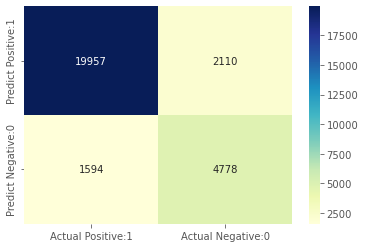

In [150]:
cm = confusion_matrix(y_test, rf_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Logistic Regression

In [173]:
lr_pred = lr_model.predict(x_test_rfe)
accuracy = roc_auc_score(y_test, lr_pred)
print('predicted response: ', lr_pred, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, lr_pred))

predicted response: 
[0. 0. 0. ... 0. 0. 1.]
Accuracy:  0.8033188303349746
Mean squared error: 0.19


<AxesSubplot:>

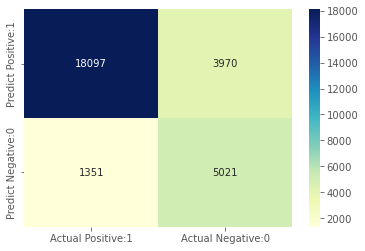

In [152]:
cm = confusion_matrix(y_test, lr_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Support Vector Machine

In [110]:
svc_pred = svc_model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, lr_pred)
print('predicted response: ', svc_pred, sep='\n')
print('Accuracy: ',accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, svc_pred))

NameError: name 'svc_model' is not defined

## Kesimpulan